# RandomMachine Tutorial

Welcome to the **RandomMachine** tutorial! This notebook will guide you through using the randommachine library for ensemble learning with random boosting models.

## What is RandomMachine?

RandomMachine is a Python library that provides random ensemble learning models combining various boosting algorithms including LightGBM, CatBoost, and XGBoost. It implements custom gradient boosting with random base learner selection.

## Table of Contents

1. [Installation](#installation)
2. [Quick Start - Regression](#quick-start-regression)
3. [Quick Start - Classification](#quick-start-classification)
4. [Available Models](#available-models)
5. [Model Comparison](#model-comparison)
6. [Advanced Features](#advanced-features)
7. [Hyperparameter Tuning](#hyperparameter-tuning)

## 1. Installation

First, let's install the required dependencies:

```bash
pip install randommachine
# or from source
pip install -e .
```

For this tutorial, we'll also need scikit-learn for datasets and metrics.

In [30]:
# Import required libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, classification_report

# Import base learners for comparison
import lightgbm as lgb
import catboost as cb

# Import randommachine models and losses
from randommachine import (
    # Loss functions
    MeanSquaredError,
    LogisticLoss,
    # LGBM models
    RandomLGBMRegressor,
    RandomLGBMClassifier,
    # CatBoost models
    RandomCatBoostRegressor,
    RandomCatBoostClassifier,
    # Generic random models (user-supplied base learners)
    RandomRegressor,
    RandomClassifier,
    # XGBoost models
    RandomXGBRegressor,
    RandomXGBClassifier,
)


# Set random seed for reproducibility
np.random.seed(42)
print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Quick Start - Regression

Let's start with a simple regression example using RandomLGBMRegressor.

In [293]:
# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=20, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (400, 20)
Test set size: (100, 20)


In [294]:
# Create and train RandomLGBMRegressor
model = RandomLGBMRegressor(
    loss=MeanSquaredError,
    num_iterations=10,
    learning_rate=0.5,
    min_max_depth=3,
    max_max_depth=6,
    early_stopping_rounds=10,
    tree_iterations=100,
    tree_learning_rate=0.1,
    random_state=42
)

print("Training RandomLGBMRegressor...")
model.fit(X_train, y_train, X_eval=X_test, y_eval=y_test)

Training RandomLGBMRegressor...
Iteration: 0 Train loss: 15984.975775496318 Lowest loss: 15984.975775496318 at Iteration: 0 Eval loss: 18678.18676234823 Lowest eval loss: 18678.18676234823 at Iteration: 0
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=4, random_state=42, reg_lambda=3.0)


Iteration: 1 Train loss: 4317.937262867287 Lowest loss: 4317.937262867287 at Iteration: 1 Eval loss: 7584.009543297801 Lowest eval loss: 7584.009543297801 at Iteration: 1
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, random_state=42, reg_lambda=3.0)


Iteration: 2 Train loss: 1168.625390976729 Lowest loss: 1168.625390976729 at Iteration: 2 Eval loss: 2024.4899397048098 Lowest eval loss: 2024.4899397048098 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, random_state=42, reg_lambda=3.0)




Iteration: 3 Train loss: 337.1330917415515 Lowest loss: 337.1330917415515 at Iteration: 3 Eval loss: 12992.011115878382 Lowest eval loss: 2024.4899397048098 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, random_state=42, reg_lambda=3.0)


Iteration: 4 Train loss: 107.13260418401107 Lowest loss: 107.13260418401107 at Iteration: 4 Eval loss: 45775.277913149315 Lowest eval loss: 2024.4899397048098 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=3, random_state=42, reg_lambda=3.0)


Iteration: 5 Train loss: 44.679739803751815 Lowest loss: 44.679739803751815 at Iteration: 5 Eval loss: 102656.22047956176 Lowest eval loss: 2024.4899397048098 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=3, random_state=42, reg_lambda=3.0)


Iteration: 6 Train loss: 22.84168802227732 Lowest loss: 22.84168802227732 at Iteration: 6 Eval loss: 184468.13173162055 Lowest eval loss: 2024.4899397048098 at Iteration: 2
Learner chose

In [295]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 1972.36
Root Mean Squared Error: 44.41
R² Score: 0.8944


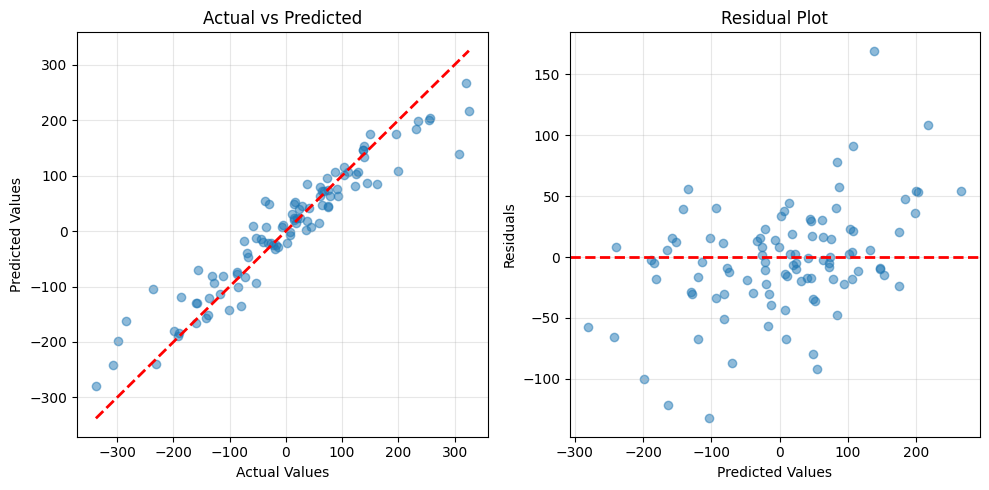

In [296]:
# Visualize predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Quick Start - Classification

Now let's try a classification task using RandomCatBoostClassifier.

In [301]:
# Generate synthetic classification data
X, y = make_classification(
    n_samples=500,
    n_features=20,
    n_informative=10,
    n_redundant=3,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Class distribution: {np.bincount(y)}")

Training set size: (400, 20)
Test set size: (100, 20)
Class distribution: [250 250]


In [302]:
# Create and train RandomCatBoostClassifier
classifier = RandomCatBoostClassifier(
    loss=LogisticLoss,
    num_iterations=10,
    learning_rate=0.5,
    min_max_depth=3,
    max_max_depth=6,
    early_stopping_rounds=5,
    tree_iterations=50,
    tree_logging_level='Silent',
    random_state=42
)

print("Training RandomCatBoostClassifier...")
classifier.fit(X_train, y_train, X_eval=X_test, y_eval=y_test)

Training RandomCatBoostClassifier...
Iteration: 0 Train loss: 0.6931471805599452 Lowest loss: 0.6931471805599452 at Iteration: 0 Eval loss: 0.6931471805599453 Lowest eval loss: 0.6931471805599453 at Iteration: 0
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=4, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 1 Train loss: 0.3363989088987346 Lowest loss: 0.3363989088987346 at Iteration: 1 Eval loss: 0.45356060280833155 Lowest eval loss: 0.45356060280833155 at Iteration: 1
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=6, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 2 Train loss: 0.18298933810494006 Lowest loss: 0.18298933810494006 at Iteration: 2 Eval loss: 0.27826055021021223 Lowest eval loss: 0.27826055021021223 at Iteration: 2
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, loggin

In [303]:
# Make predictions
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9100

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.97      0.89      0.93        63

    accuracy                           0.91       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100



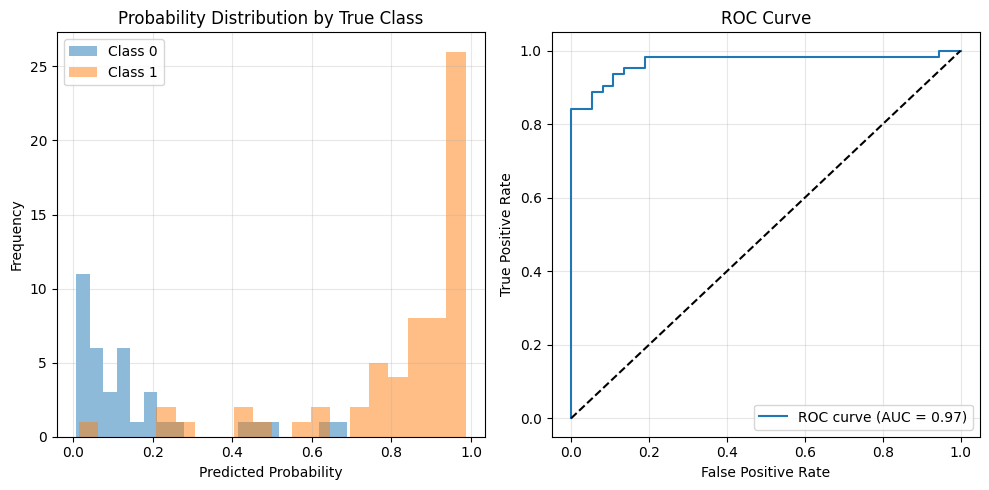

In [304]:
# Visualize probability predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y_proba[y_test == 0], bins=20, alpha=0.5, label='Class 0')
plt.hist(y_proba[y_test == 1], bins=20, alpha=0.5, label='Class 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by True Class')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Available Models

### Regression Models
- **RandomLGBMRegressor**: Uses LightGBM with random tree depths
- **RandomCatBoostRegressor**: Uses CatBoost with random tree depths
- **RandomXGBRegressor**: Uses XGBoost with random tree depths
- **RandomRegressor**: Generic — pass any list of sklearn-compatible estimators as `base_learners`

### Classification Models
- **RandomLGBMClassifier**: Uses LightGBM with random tree depths
- **RandomCatBoostClassifier**: Uses CatBoost with random tree depths
- **RandomXGBClassifier**: Uses XGBoost with random tree depths
- **RandomClassifier**: Generic — pass any list of sklearn-compatible regression estimators as `base_learners`

Let's try the RandomRegressor which mixes CatBoost and LightGBM base learners.

In [291]:
# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=20, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (400, 20)
Test set size: (100, 20)


In [292]:
# Try RandomRegressor (mixes CatBoost and LightGBM with explicit base learner pool)
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor as LGBMReg

mixed_learners = (
    [CatBoostRegressor(max_depth=d, iterations=40, learning_rate=0.3,
                       logging_level='Silent', random_state=42)
     for d in range(3, 6)]
    + [LGBMReg(max_depth=d, n_estimators=4, learning_rate=0.3,
               random_state=42, verbose=-1)
       for d in range(3, 6)]
)

random_model = RandomRegressor(
    base_learners=mixed_learners,
    loss=MeanSquaredError,
    num_iterations=25,
    learning_rate=0.3,
    early_stopping_rounds=5,
    random_state=42,
)

print("Training RandomRegressor...")
random_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_random = random_model.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"\nRandom Mixed Model Performance:")
print(f"MSE: {mse_random:.2f}")
print(f"R² Score: {r2_random:.4f}")

Training RandomRegressor...
Iteration: 0 Train loss: 15984.975775496318 Lowest loss: 15984.975775496318 at Iteration: 0
Learner chosen: CatBoostRegressor(iterations=40, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=5, random_state=42)


Iteration: 1 Train loss: 8196.252563729204 Lowest loss: 8196.252563729204 at Iteration: 1
Learner chosen: LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=4, random_state=42,
              verbose=-1)


Iteration: 2 Train loss: 5730.815349678676 Lowest loss: 5730.815349678676 at Iteration: 2
Learner chosen: LGBMRegressor(learning_rate=0.3, max_depth=4, n_estimators=4, random_state=42,
              verbose=-1)


Iteration: 3 Train loss: 4211.941416257596 Lowest loss: 4211.941416257596 at Iteration: 3
Learner chosen: LGBMRegressor(learning_rate=0.3, max_depth=3, n_estimators=4, random_state=42,
              verbose=-1)


Iteration: 4 Train loss: 3289.585510314016 Lowest loss: 3289.585510314016 at Iteration: 4
Learn



Iteration: 5 Train loss: 1840.8694425893582 Lowest loss: 1840.8694425893582 at Iteration: 5
Learner chosen: CatBoostRegressor(iterations=40, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=3, random_state=42)


Iteration: 6 Train loss: 1062.7750141529457 Lowest loss: 1062.7750141529457 at Iteration: 6
Learner chosen: CatBoostRegressor(iterations=40, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=3, random_state=42)


Iteration: 7 Train loss: 640.9356936073397 Lowest loss: 640.9356936073397 at Iteration: 7
Learner chosen: LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=4, random_state=42,
              verbose=-1)


Iteration: 8 Train loss: 502.63574740396683 Lowest loss: 502.63574740396683 at Iteration: 8
Learner chosen: LGBMRegressor(learning_rate=0.3, max_depth=3, n_estimators=4, random_state=42,
              verbose=-1)


Iteration: 9 Train loss: 429.59025625290616 Lowest loss: 429.59025625290616 at Iteration: 9
Le

## 5. Model Comparison

Let's compare RandomMachine models against plain LightGBM and CatBoost to see the actual benefit of random depth selection.

In [289]:
# Import base learners for comparison
import lightgbm as lgb
import catboost as cb
import xgboost as xgb

# Generate a larger dataset for comparison
X_comp, y_comp = make_regression(n_samples=1000, n_features=20, noise=10, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_comp, y_comp, test_size=0.2, random_state=42
)

# Define models to compare (including baselines)
models = {
    # Baseline: Plain models
    'LightGBM (baseline)': lgb.LGBMRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbose=-1
    ),
    'CatBoost (baseline)': cb.CatBoostRegressor(
        iterations=1000, learning_rate=0.03, depth=5, random_state=42, verbose=False
    ),
    'XGBoost (baseline)': xgb.XGBRegressor(
        n_estimators=100, learning_rate=0.3, max_depth=5, random_state=42, verbosity=0
    ),

    # RandomMachine models
    'RandomLGBM': RandomLGBMRegressor(
        num_iterations=5, learning_rate=0.5, min_max_depth=3,
        max_max_depth=6, tree_iterations=20, tree_learning_rate=0.5,
        early_stopping_rounds=10, random_state=42
    ),
    'RandomCatBoost': RandomCatBoostRegressor(
        num_iterations=25, learning_rate=0.3, min_max_depth=3,
        max_max_depth=6, tree_iterations=40, tree_learning_rate=0.3,
        tree_logging_level='Silent',
        early_stopping_rounds=10, random_state=42
    ),
    'RandomXGB': RandomXGBRegressor(
        num_iterations=5, learning_rate=0.5, min_max_depth=3,
        max_max_depth=6, tree_iterations=20, tree_learning_rate=0.5,
        early_stopping_rounds=10, random_state=42
    ),
    'RandomMixed': RandomRegressor(
        base_learners=(
            [cb.CatBoostRegressor(max_depth=d, iterations=40, learning_rate=0.3,
                                  logging_level='Silent', random_state=42)
             for d in range(3, 7)]
            + [lgb.LGBMRegressor(max_depth=d, n_estimators=4, learning_rate=0.5,
                                 random_state=42, verbose=-1)
               for d in range(3, 7)]
        ),
        num_iterations=25, learning_rate=0.3, early_stopping_rounds=10, random_state=42
    ),
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_c, y_train_c)
    y_pred = model.predict(X_test_c)

    mse = mean_squared_error(y_test_c, y_pred)
    r2 = r2_score(y_test_c, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.4f}")


Training LightGBM (baseline)...
LightGBM (baseline) - MSE: 2993.02, R²: 0.9230

Training CatBoost (baseline)...
CatBoost (baseline) - MSE: 926.33, R²: 0.9762

Training XGBoost (baseline)...
XGBoost (baseline) - MSE: 4053.03, R²: 0.8958

Training RandomLGBM...
Iteration: 0 Train loss: 37948.07863987374 Lowest loss: 37948.07863987374 at Iteration: 0
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=4,
              n_estimators=20, random_state=42, reg_lambda=3.0)


Iteration: 1 Train loss: 10088.336217930373 Lowest loss: 10088.336217930373 at Iteration: 1
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=6,
              n_estimators=20, random_state=42, reg_lambda=3.0)


Iteration: 2 Train loss: 2661.8492532873806 Lowest loss: 2661.8492532873806 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=5,
              n_estimators=20, random_state=42, reg_lambda=3.0)


Iteration: 3 Train loss:


Results Summary:
                             MSE        R2
LightGBM (baseline)  2993.024151  0.923034
CatBoost (baseline)   926.325123  0.976179
XGBoost (baseline)   4053.034314  0.895775
RandomLGBM           2682.880087  0.931009
RandomCatBoost        688.263616  0.982301
RandomXGB            3696.884970  0.904934
RandomMixed          1314.777218  0.966190

BASELINE vs RANDOMMACHINE:
Avg R² - Baseline models: 0.9317
Avg R² - RandomMachine models: 0.9461
Improvement: 1.55%


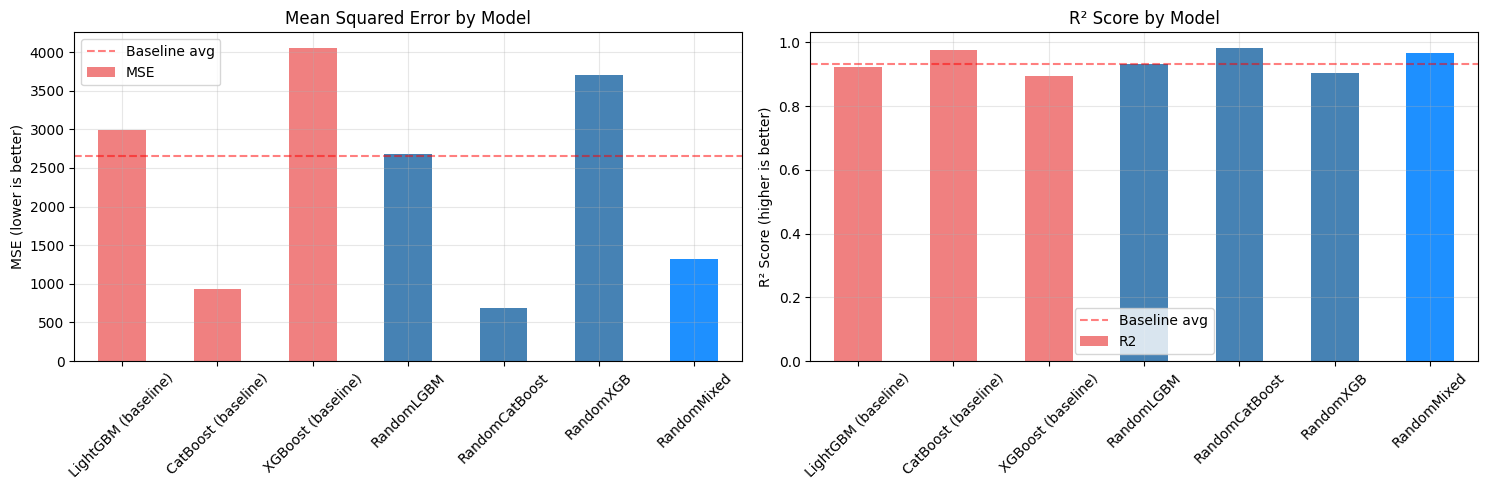

In [290]:
# Visualize comparison
import pandas as pd

df_results = pd.DataFrame(results).T
print("\nResults Summary:")
print(df_results)
print("\n" + "="*60)
print("BASELINE vs RANDOMMACHINE:")
print("="*60)
baseline_keys = ['LightGBM (baseline)', 'CatBoost (baseline)', 'XGBoost (baseline)']
random_keys = ['RandomLGBM', 'RandomCatBoost', 'RandomXGB', 'RandomMixed']
baseline_avg = df_results.loc[baseline_keys, 'R2'].mean()
random_avg = df_results.loc[random_keys, 'R2'].mean()
print(f"Avg R² - Baseline models: {baseline_avg:.4f}")
print(f"Avg R² - RandomMachine models: {random_avg:.4f}")
print(f"Improvement: {((random_avg - baseline_avg) / baseline_avg * 100):.2f}%")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Color code: baselines (lightcoral) vs random models (blue shades)
colors = ['lightcoral', 'lightcoral', 'lightcoral', 'steelblue', 'steelblue', 'steelblue', 'dodgerblue']

df_results['MSE'].plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Mean Squared Error by Model')
axes[0].set_ylabel('MSE (lower is better)')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=df_results.loc[baseline_keys, 'MSE'].mean(),
                color='red', linestyle='--', alpha=0.5, label='Baseline avg')
axes[0].legend()

df_results['R2'].plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('R² Score by Model')
axes[1].set_ylabel('R² Score (higher is better)')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=baseline_avg, color='red', linestyle='--', alpha=0.5, label='Baseline avg')
axes[1].legend()

plt.tight_layout()
plt.show()

### Classification Comparison

Now let's compare classification performance: baseline vs RandomMachine models.

In [299]:
# Generate classification dataset
X_clf, y_clf = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_redundant=3, random_state=42
)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Define classification models to compare
clf_models = {
    # Baseline: Plain models
    'LightGBM (baseline)': lgb.LGBMClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbose=-1
    ),
    'CatBoost (baseline)': cb.CatBoostClassifier(
        iterations=1000, learning_rate=0.5, depth=5, random_state=42, verbose=False
    ),
    'XGBoost (baseline)': xgb.XGBClassifier(
        n_estimators=100, learning_rate=0.3, max_depth=5, random_state=42, verbosity=0
    ),

    # RandomMachine models (classification with correct LogisticLoss gradients)
    'RandomLGBM': RandomLGBMClassifier(
        num_iterations=5, learning_rate=0.5, min_max_depth=3,
        max_max_depth=6, tree_iterations=20, tree_learning_rate=0.1,
        early_stopping_rounds=10, random_state=42
    ),
    'RandomCatBoost': RandomCatBoostClassifier(
        num_iterations=25, learning_rate=0.3, min_max_depth=3,
        max_max_depth=6, tree_iterations=40, tree_learning_rate=0.3,
        tree_logging_level='Silent',
        early_stopping_rounds=10, random_state=42
    ),
    'RandomXGB': RandomXGBClassifier(
        num_iterations=5, learning_rate=0.5, min_max_depth=3,
        max_max_depth=6, tree_iterations=20, tree_learning_rate=0.3,
        early_stopping_rounds=10, random_state=42
    ),
    'RandomMixed': RandomClassifier(
        base_learners=(
            [cb.CatBoostRegressor(max_depth=d, iterations=100, learning_rate=0.5,
                                  reg_lambda=1.0, logging_level='Silent', random_state=42)
             for d in range(3, 7)]
            + [lgb.LGBMRegressor(max_depth=d, n_estimators=100, learning_rate=0.5,
                                 reg_lambda=1.0, random_state=42, verbose=-1)
               for d in range(3, 7)]
        ),
        num_iterations=30, learning_rate=0.3, early_stopping_rounds=10, random_state=42
    ),
}

clf_results = {}

for name, model in clf_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)

    acc = accuracy_score(y_test_clf, y_pred)
    clf_results[name] = {'Accuracy': acc}
    print(f"{name} - Accuracy: {acc:.4f}")


Training LightGBM (baseline)...
LightGBM (baseline) - Accuracy: 0.8900

Training CatBoost (baseline)...
CatBoost (baseline) - Accuracy: 0.9200

Training XGBoost (baseline)...
XGBoost (baseline) - Accuracy: 0.8950

Training RandomLGBM...
Iteration: 0 Train loss: 0.6931471805599452 Lowest loss: 0.6931471805599452 at Iteration: 0
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=4, n_estimators=20, random_state=42,
              reg_lambda=3.0)


Iteration: 1 Train loss: 0.4646235242287196 Lowest loss: 0.4646235242287196 at Iteration: 1
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, n_estimators=20, random_state=42,
              reg_lambda=3.0)


Iteration: 2 Train loss: 0.3271748606605645 Lowest loss: 0.3271748606605645 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, n_estimators=20, random_state=42,
              reg_lambda=3.0)


Iteration: 3 Train loss: 0.24745215439042645 Lowest loss: 0.24745215439042645 at Iteration: 3
Learner 


Classification Results Summary:
                     Accuracy
LightGBM (baseline)     0.890
CatBoost (baseline)     0.920
XGBoost (baseline)      0.895
RandomLGBM              0.890
RandomCatBoost          0.935
RandomXGB               0.920
RandomMixed             0.935

BASELINE vs RANDOMMACHINE (Classification):
Avg Accuracy - Baseline models: 0.9017
Avg Accuracy - RandomMachine models: 0.9200
Improvement: 2.03%


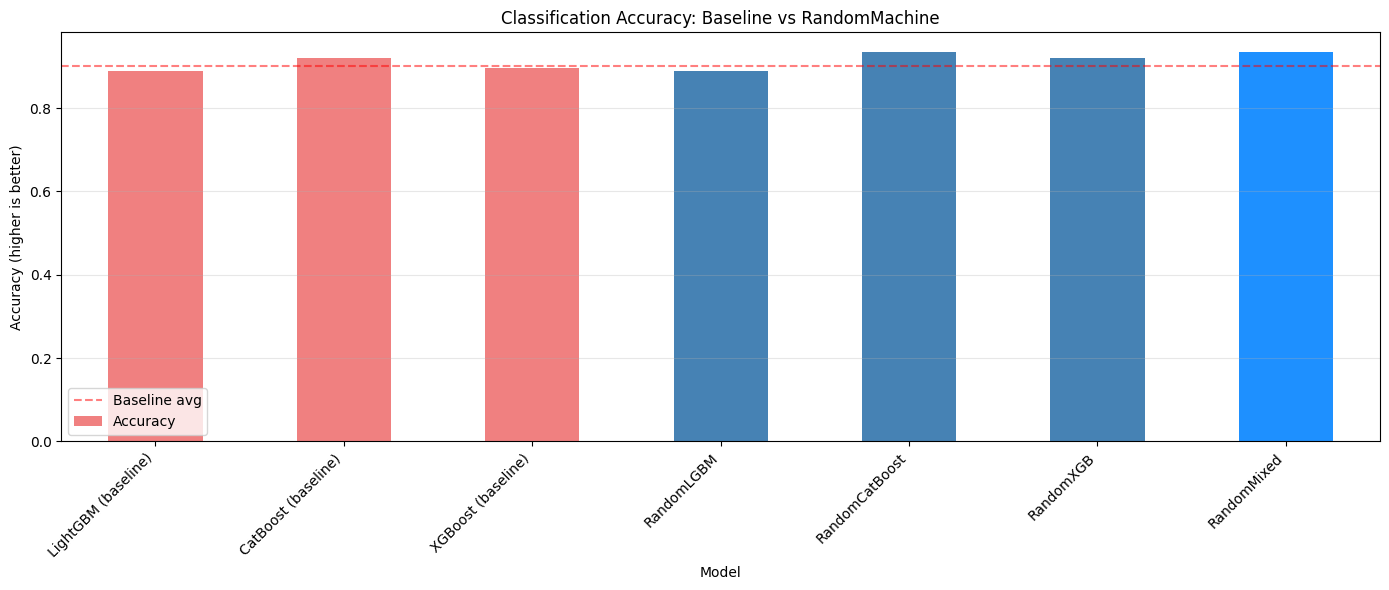

In [300]:
# Visualize classification comparison
df_clf_results = pd.DataFrame(clf_results).T
print("\nClassification Results Summary:")
print(df_clf_results)
print("\n" + "="*60)
print("BASELINE vs RANDOMMACHINE (Classification):")
print("="*60)
baseline_keys_clf = ['LightGBM (baseline)', 'CatBoost (baseline)', 'XGBoost (baseline)']
random_keys_clf = ['RandomLGBM', 'RandomCatBoost', 'RandomXGB', 'RandomMixed']
baseline_avg_clf = df_clf_results.loc[baseline_keys_clf, 'Accuracy'].mean()
random_avg_clf = df_clf_results.loc[random_keys_clf, 'Accuracy'].mean()
print(f"Avg Accuracy - Baseline models: {baseline_avg_clf:.4f}")
print(f"Avg Accuracy - RandomMachine models: {random_avg_clf:.4f}")
print(f"Improvement: {((random_avg_clf - baseline_avg_clf) / baseline_avg_clf * 100):.2f}%")
print("="*60)

# Plot
plt.figure(figsize=(14, 6))
colors_clf = ['lightcoral', 'lightcoral', 'lightcoral', 'steelblue', 'steelblue', 'steelblue', 'dodgerblue']

df_clf_results['Accuracy'].plot(kind='bar', color=colors_clf)
plt.title('Classification Accuracy: Baseline vs RandomMachine')
plt.ylabel('Accuracy (higher is better)')
plt.xlabel('Model')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=baseline_avg_clf, color='red', linestyle='--', alpha=0.5, label='Baseline avg')
plt.legend()
plt.tight_layout()
plt.show()

### Generic RandomClassifier with Custom Base Learners

`RandomClassifier` (and `RandomRegressor`) accept any list of sklearn-compatible estimators,
letting you mix any combination of learners — e.g. LGBM + XGBoost + CatBoost — without being
limited to the auto-generated pool.

In [305]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Build a custom pool
custom_learners = [
    XGBRegressor(max_depth=4, n_estimators=100, learning_rate=0.3, verbosity=0),
    CatBoostRegressor(depth=6, iterations=100, learning_rate=0.3, verbose=False),
]

generic_clf = RandomClassifier(
    base_learners=custom_learners,
    num_iterations=30,
    learning_rate=0.5,
    early_stopping_rounds=10,
    random_state=42,
)

print("Training generic RandomClassifier with custom base learners...")
generic_clf.fit(X_train_clf, y_train_clf)

y_pred_generic = generic_clf.predict(X_test_clf)
acc_generic = accuracy_score(y_test_clf, y_pred_generic)
print(f"\nGeneric RandomClassifier Accuracy: {acc_generic:.4f}")
print(f"Base learner pool size: {len(generic_clf.base_learners_)}")
print(f"Boosting iterations run: {len(generic_clf.ensemble_)}")

Training generic RandomClassifier with custom base learners...
Iteration: 0 Train loss: 0.6931471805599452 Lowest loss: 0.6931471805599452 at Iteration: 0
Learner chosen: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


Iteration: 1 Train loss: 0.321811902345588 Lowest loss: 0.321811902345588 at Itera

## 6. Advanced Features

### Loss Functions

RandomMachine supports custom loss functions. You can use:
- **MeanSquaredError**: For regression tasks
- **LogisticLoss**: For binary classification

Both loss functions compute gradients and Hessians for second-order optimization.

In [ ]:
# Example: Using different loss functions
from randommachine import MeanSquaredError, LogisticLoss

# For regression
regressor = RandomLGBMRegressor(
    loss=MeanSquaredError,  # Explicitly set loss
    num_iterations=10,
    learning_rate=0.5,
    random_state=42
)

# For classification
classifier = RandomLGBMClassifier(
    loss=LogisticLoss,  # Explicitly set loss
    num_iterations=10,
    learning_rate=0.5,
    random_state=42
)

print("Loss functions configured successfully!")

Loss functions configured successfully!


### Early Stopping

All models support early stopping to prevent overfitting. Use the `early_stopping_rounds` parameter and provide evaluation data.

In [306]:
# Example with early stopping
model_es = RandomCatBoostRegressor(
    num_iterations=25,  # Maximum iterations
    learning_rate=0.3,
    early_stopping_rounds=10,  # Stop if no improvement for 10 rounds
    tree_logging_level='Silent',
    random_state=42
)

print("Training with early stopping...")
model_es.fit(X_train, y_train, X_eval=X_test, y_eval=y_test)

print(f"\nActual number of iterations: {len(model_es.ensemble_)}")

Training with early stopping...
Iteration: 0 Train loss: 0.4675 Lowest loss: 0.4675 at Iteration: 0 Eval loss: 0.63 Lowest eval loss: 0.63 at Iteration: 0
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=5, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 1 Train loss: 0.23000996804930424 Lowest loss: 0.23000996804930424 at Iteration: 1 Eval loss: 0.375338937040931 Lowest eval loss: 0.375338937040931 at Iteration: 1
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=8, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 2 Train loss: 0.11271828058307172 Lowest loss: 0.11271828058307172 at Iteration: 2 Eval loss: 0.13053206301511522 Lowest eval loss: 0.13053206301511522 at Iteration: 2
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=7, ran

### Ensemble Inspection

You can inspect the trained ensemble to see which learners were selected.

In [307]:
# Inspect the ensemble
print(f"Number of learners in ensemble: {len(model_es.ensemble_)}")
print(f"\nFirst few learners:")
for i, learner in enumerate(model_es.ensemble_[:3]):
    print(f"  Learner {i+1}: {type(learner).__name__}")

Number of learners in ensemble: 10

First few learners:
  Learner 1: CatBoostRegressor
  Learner 2: CatBoostRegressor
  Learner 3: CatBoostRegressor


### Feature Importance

Each base learner in the ensemble exposes `feature_importances_`. We average them across all ensemble members to get an overall importance score per feature.

Top 10 most important features:
   Feature  Importance
 Feature 4   47.024667
Feature 19   44.032936
Feature 16   43.845567
 Feature 9   42.663108
Feature 13   38.630701
 Feature 8   37.196825
Feature 12   36.770311
Feature 10   33.959449
Feature 15   29.719803
 Feature 6   29.187866


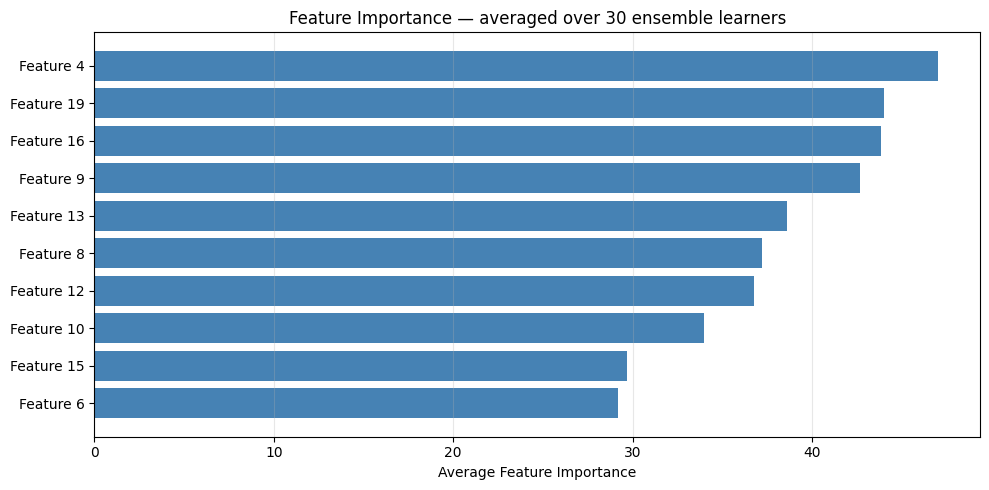

In [308]:
def get_feature_importance(trained_model, feature_names=None):
    """Average feature_importances_ across all ensemble members that support it."""
    importances = []
    for learner in trained_model.ensemble_:
        if hasattr(learner, 'feature_importances_'):
            importances.append(learner.feature_importances_)

    if not importances:
        print("No learners with feature_importances_ in this ensemble.")
        return None

    avg_importance = np.mean(importances, axis=0)
    n_features = len(avg_importance)

    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(n_features)]

    fi_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': avg_importance,
    }).sort_values('Importance', ascending=False).reset_index(drop=True)

    return fi_df


# Use the RandomLGBMRegressor trained in section 2
fi_df = get_feature_importance(model)

print("Top 10 most important features:")
print(fi_df.head(10).to_string(index=False))

# Visualize
top = fi_df.head(10).iloc[::-1]  # reverse for horizontal bar
plt.figure(figsize=(10, 5))
plt.barh(top['Feature'], top['Importance'], color='steelblue')
plt.xlabel('Average Feature Importance')
plt.title(f'Feature Importance — averaged over {len(model.ensemble_)} ensemble learners')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning

Key hyperparameters to tune:

- **num_iterations**: Number of boosting rounds (higher = more complex model)
- **learning_rate**: Step size for gradient descent (0.01 - 1.0)
- **min_max_depth / max_max_depth**: Range of tree depths to sample from
- **tree_iterations**: Number of iterations for each base tree
- **tree_learning_rate**: Learning rate for base trees
- **tree_reg_lambda**: L2 regularization for base trees
- **early_stopping_rounds**: Patience for early stopping

Let's see the effect of learning rate:

Iteration: 0 Train loss: 0.4675 Lowest loss: 0.4675 at Iteration: 0
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=4,
              n_estimators=25, random_state=42, reg_lambda=3.0)


Iteration: 1 Train loss: 0.38244755952576637 Lowest loss: 0.38244755952576637 at Iteration: 1
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=5,
              n_estimators=25, random_state=42, reg_lambda=3.0)


Iteration: 2 Train loss: 0.31190868511628334 Lowest loss: 0.31190868511628334 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=5,
              n_estimators=25, random_state=42, reg_lambda=3.0)


Iteration: 3 Train loss: 0.2546760917972744 Lowest loss: 0.2546760917972744 at Iteration: 3
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=4,
              n_estimators=25, random_state=42, reg_lambda=3.0)


Learning Rate 0.1: MSE = 0.33
Iteration: 0 Train loss: 0.4675 Lo

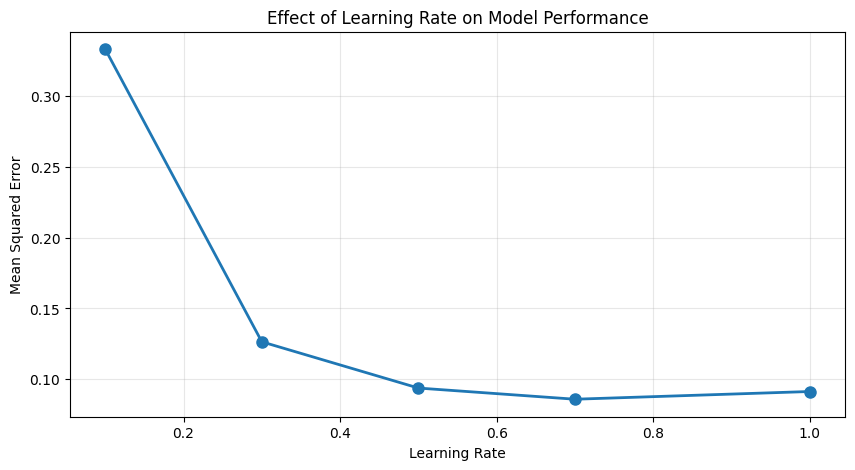

In [313]:
# Compare different learning rates
learning_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
lr_results = []

for lr in learning_rates:
    model = RandomLGBMRegressor(
        num_iterations=4,
        learning_rate=lr,
        min_max_depth=3,
        max_max_depth=5,
        tree_iterations=25,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    lr_results.append(mse)
    print(f"Learning Rate {lr}: MSE = {mse:.2f}")

# Visualize
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, lr_results, 'o-', linewidth=2, markersize=8)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Learning Rate on Model Performance')
plt.grid(True, alpha=0.3)
plt.show()

## Summary

In this tutorial, we covered:

1. ✅ **Installation** and setup
2. ✅ **Regression** with RandomLGBMRegressor
3. ✅ **Classification** with RandomCatBoostClassifier
4. ✅ **Different model types** (LGBM, CatBoost, XGBoost, Random)
5. ✅ **Model comparison** and evaluation
6. ✅ **Advanced features** (loss functions, early stopping, ensemble inspection)
7. ✅ **Hyperparameter tuning** strategies

## Next Steps

- Try RandomMachine on your own datasets
- Experiment with different hyperparameters
- Compare with traditional boosting methods
- Explore the source code to understand the algorithms

## Additional Resources

- **GitHub Repository**: https://github.com/ghiffaryr/randommachine

Happy learning! 🚀